In [26]:
import numpy as np
np.set_printoptions(threshold=None)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

# I. Réduction de dimensions et Visualisation des données

## 1. Analyse de villes.csv

PC1 value:  0.8726819348921446
Variance des 2 premiers axes: 
 [[ 0.27  0.29  0.3   0.3   0.28  0.28  0.27  0.29  0.3   0.3   0.29  0.27]
 [ 0.4   0.3   0.13 -0.12 -0.32 -0.36 -0.39 -0.3  -0.11  0.12  0.26  0.39]]


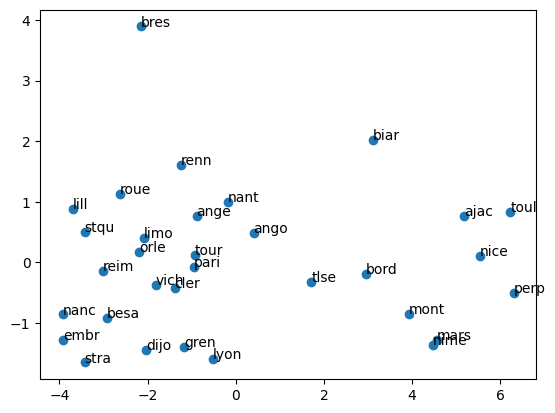

In [27]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

#Le premier axe du ACP content plus de 70% de l'information
print("PC1 value: ", pca.explained_variance_ratio_[0])

"""
- Pour le 1er axe: les features ont tous une importance autour de 0.27
- Pour le 2ème axe: le 3ème, le 4ème, le 9ème et le 10ème ont très peu d'influence tandis
que les autres featues en ont beaucoup plus
"""

print("Variance des 2 premiers axes: \n", pca.components_[:2].round(2))

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
	plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 2. Analyse de crimes.csv

PC1 value:  0.7648116201908643
Variance des 2 premiers axes: 
 [[ 0.3   0.43  0.4   0.4   0.44  0.36  0.3 ]
 [-0.63 -0.17  0.04 -0.34  0.2   0.4   0.5 ]]


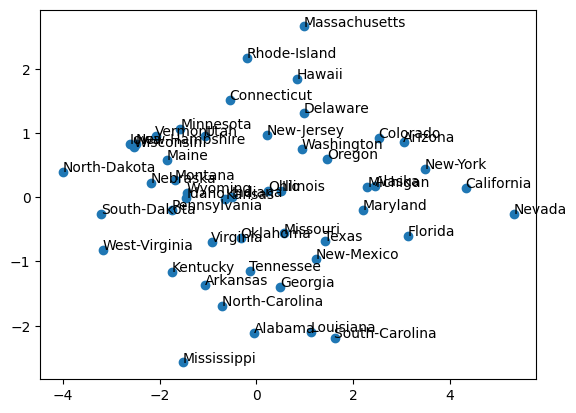

In [28]:
data = pd.read_csv('./crimes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

"""
Les 2 premiers axes du ACP content plus de 70% de l'information
"""
print("PC1 value: ", sum(pca.explained_variance_ratio_[:2]))

"""
- Pour le 1er axe: les features ont tous une importance autour de 0.35
- Pour le 2ème axe: le 3ème a très peu d'influence tandis
que le 1er en a énormément par rapport aux autres
"""
print("Variance des 2 premiers axes: \n", pca.components_[:2].round(2))

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
	plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

# II. Clustering

## 1. Kmeans

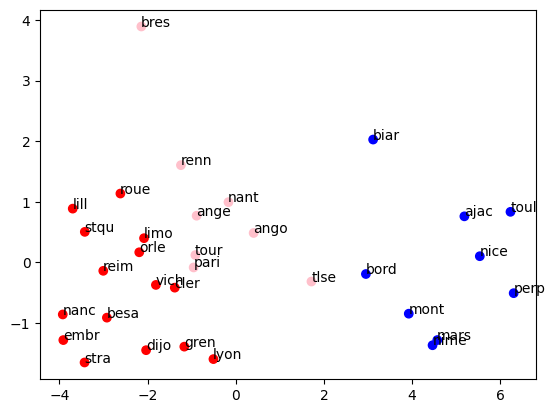

In [35]:
from sklearn.cluster import KMeans

data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))
clustering = KMeans(n_clusters=3).fit_predict(X)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
	plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 2. AgglomerativeClustering

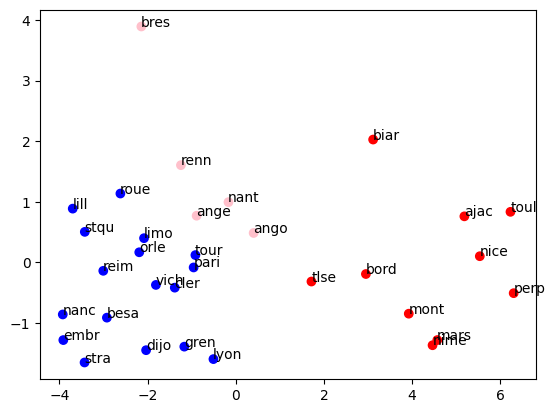

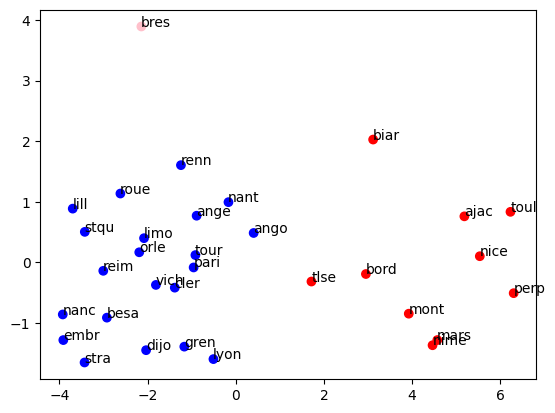

In [38]:
from sklearn.cluster import AgglomerativeClustering

""" Ward """

clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
	plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

""" Average """

clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
	plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## 3. Déterminer la meilleure partition (nombre de clusters) pour la méthode KMeans

In [40]:
from sklearn import metrics
for i in np.arange(2, 6):
	clustering = KMeans(n_clusters=i).fit_predict(X)
	print(metrics.silhouette_score(X, clustering,metric='euclidean'))
print()

#La meilleur partition selon l'indice Silhouette est celui de 2

0.6181156437258204
0.40912000832289414
0.34071480805834065
0.32075396348111507

